# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("assets/billboard.csv")
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. row entry - song, time, genre, date entered, date peaked, and the position on the billboard for every week
2. 76 weeks? when was the first?
3. Genres affect position?
4. length of the song? all average?
5. the date it was entered affected the position on billboard?
6. if introduced later, maybe it became a hit later?

In [3]:
df.describe()

/Users/Marat/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Year range - from 2000 to 2000
2. 317 entries?
3. NANs mess up the stats?
4. Count of "0" for the last columns indicates that those columns are empty

In [4]:
#Let's omit the columns that are entirely null
df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert the duration of each song into seconds
type(df["time"][0])

str

In [7]:
#First, we separate the 'time' column into minutes and seconds
time_separated = df["time"].apply(lambda x: x.split(":"))
print time_separated.head()

0    [3, 38]
1    [4, 18]
2    [4, 07]
3    [3, 45]
4    [3, 38]
Name: time, dtype: object


In [8]:
# we then re-assign the values to a new column in df
df["time"] = time_separated.apply(lambda x: int(x[0])*60+int(x[1]))
df["time"].head()

0    218
1    258
2    247
3    225
4    218
Name: time, dtype: int64

In [9]:
#let's look at the duration of our songs, we will use it later
df["time"].describe()

count    317.000000
mean     242.425868
std       42.401618
min      156.000000
25%      219.000000
50%      236.000000
75%      257.000000
max      470.000000
Name: time, dtype: float64

In [10]:
#increase the display capacity in a jupyter notebook
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [25]:
#group songs by Genre
df_genre = df.groupby("genre").describe()
print df_genre.head()

                     time  x10th.week  x11th.week  x12th.week  x13th.week  \
genre                                                                       
Country count   74.000000   61.000000   59.000000   56.000000   53.000000   
        mean   226.689189   52.377049   51.016949   50.714286   52.301887   
        std     38.378763   19.605411   20.156706   19.382011   20.353213   
        min    156.000000   25.000000   13.000000   11.000000   11.000000   
        25%    200.500000         NaN         NaN         NaN         NaN   

               x14th.week  x15th.week  x16th.week  x17th.week  x18th.week  \
genre                                                                       
Country count   51.000000   49.000000   44.000000   42.000000   42.000000   
        mean    55.333333   59.306122   60.977273   65.285714   71.809524   
        std     22.005151   23.438931   22.944309   22.306387   21.896918   
        min     15.000000   12.000000   12.000000   13.000000   16.000000  

In [34]:
for row in df["genre"].unique():
    print row

Rock
Latin
Country
Rap
Pop
Electronica
Jazz
R&B
Reggae
Gospel


In [36]:
#count the number of weeks a song of a particular genre stayed on number 1
for row in df["genre"].unique():
    count = df_genre.ix[row].ix["min"][df_genre.ix[row].ix["min"]==1].count()
    print "The "+str(row)+" genre held number one spot "+str(count)+" weeks"

The Rock genre held number one spot 16 weeks
The Latin genre held number one spot 3 weeks
The Country genre held number one spot 2 weeks
The Rap genre held number one spot 0 weeks
The Pop genre held number one spot 0 weeks
The Electronica genre held number one spot 0 weeks
The Jazz genre held number one spot 0 weeks
The R&B genre held number one spot 0 weeks
The Reggae genre held number one spot 0 weeks
The Gospel genre held number one spot 0 weeks


Only three genres had their songs reach number 1 spot, and Rock genre has been the most common

In [39]:
# plot each song's ranking from week to week


In [40]:
# first, create a dataframe to hold the values for weeks in rows and songs in columns
df_by_song = pd.DataFrame(data = np.asarray(df.ix[:,'x1st.week':'x65th.week']).T.tolist(), columns = df["track"], index = df.columns[7:83])

In [41]:
df_by_song.head()

track,Independent Women Part I,"Maria, Maria",I Knew I Loved You,Music,Come On Over Baby (All I Want Is You),Doesn't Really Matter,Say My Name,Be With You,Incomplete,Amazed,It's Gonna Be Me,What A Girl Wants,Everything You Want,With Arms Wide Open,Try Again,Bent,Thank God I Found You,Breathe,Case Of The Ex (Whatcha Gonna Do),He Loves U Not,He Wasn't Man Enough,You Sang To Me,Give Me Just One Night (Una Noche),Jumpin' Jumpin',Kryptonite,Thong Song,I Turn To You,My Love Is Your Love,I Wanna Know,Get It On.. Tonite,Bye Bye Bye,The Real Slim Shady,Most Girls,Gotta Tell You,Bring It All To Me,Hot Boyz,I Try,This I Promise You,No More,Show Me The Meaning Of Being Lonely,Absolutely (Story Of A Girl),That's The Way It Is,All The Small Things,Blue (Da Ba Dee),Bag Lady,There U Go,Higher,(Hot S**t) Country Grammar,Wifey,Auld Lang Syne (The Millenium Mix),...,Stay Or Let It Go,Smoke Rings In The Dark,The Best Man I Can Be,Monica,No Me Dejes De Querer,Sour Girl,Daddy Won't Sell The Farm,You Won't Be Lonely Now,Meanwhile Back At The Ranch,Summer Rain,Real Live Woman,Shut Up,Straight Up,What Means The World To You,U Understand,Can't Stay,Can't Go For That,West Side Story,Me Neither,Take That,The Hardest Part Of Breaking Up (Is Getting Back Your Stuff),Don't Call Me Baby,Got It All,Re-Arranged,Still In My Heart,3 Little Words,If You Don't Wanna Love Me,Baby U Are,L.A. Song,The Quittin' Kind,Do You,Love Sets You Free,Riddle,No Mercy,I'm Outta Love,Pull Over,Ta Da,Dancing Queen,Where I Wanna Be,All Good?,Get Up,Spanish Guitar,I Know,Imagine That,Souljas,Cherchez LaGhost,Freakin' It,Kernkraft 400,Got Beef,Toca's Miracle
x1st.week,78.0,15.0,71.0,41.0,57.0,59.0,83.0,63.0,77.0,81.0,82.0,71.0,70.0,84.0,59.0,60.0,82.0,81.0,72.0,99.0,63.0,77.0,51.0,74.0,81.0,74.0,50.0,81.0,94.0,92.0,42.0,70.0,85.0,85.0,73.0,36.0,68.0,68.0,76.0,74.0,85.0,74.0,89.0,67.0,67.0,25.0,81.0,100.0,85.0,89.0,...,95.0,80.0,97.0,95.0,77.0,79.0,87.0,97.0,87.0,82.0,85.0,99.0,98.0,94.0,85.0,84.0,90.0,96.0,87.0,94.0,91.0,98.0,89.0,91.0,95.0,97.0,98.0,96.0,99.0,98.0,92.0,92.0,92.0,100.0,92.0,97.0,100.0,97.0,96.0,96.0,100.0,98.0,98.0,99.0,98.0,98.0,99.0,99.0,99.0,99.0
x2nd.week,63.0,8.0,48.0,23.0,47.0,52.0,83.0,45.0,66.0,54.0,70.0,51.0,61.0,78.0,53.0,37.0,68.0,68.0,57.0,92.0,55.0,54.0,39.0,71.0,70.0,63.0,39.0,68.0,86.0,80.0,20.0,32.0,70.0,72.0,63.0,21.0,51.0,31.0,38.0,62.0,71.0,68.0,76.0,29.0,53.0,15.0,77.0,99.0,61.0,89.0,...,92.0,78.0,97.0,87.0,NaN,79.0,83.0,97.0,86.0,82.0,83.0,95.0,98.0,94.0,83.0,84.0,86.0,84.0,85.0,88.0,87.0,96.0,88.0,91.0,88.0,97.0,98.0,89.0,100.0,100.0,92.0,91.0,92.0,99.0,NaN,93.0,99.0,97.0,95.0,96.0,97.0,98.0,98.0,98.0,NaN,NaN,99.0,99.0,99.0,NaN
x3rd.week,49.0,6.0,43.0,18.0,45.0,43.0,44.0,34.0,61.0,44.0,51.0,28.0,53.0,76.0,38.0,29.0,50.0,62.0,52.0,81.0,48.0,50.0,34.0,65.0,68.0,35.0,30.0,44.0,69.0,72.0,19.0,20.0,52.0,65.0,50.0,13.0,47.0,19.0,19.0,55.0,59.0,65.0,69.0,16.0,42.0,12.0,73.0,96.0,46.0,7.0,...,82.0,76.0,83.0,80.0,NaN,79.0,81.0,97.0,81.0,86.0,83.0,87.0,97.0,96.0,100.0,93.0,84.0,88.0,90.0,86.0,92.0,93.0,88.0,90.0,98.0,89.0,92.0,92.0,98.0,100.0,95.0,98.0,97.0,99.0,NaN,96.0,97.0,96.0,99.0,100.0,97.0,98.0,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN
x4th.week,33.0,5.0,31.0,14.0,29.0,30.0,38.0,23.0,61.0,39.0,39.0,18.0,46.0,74.0,28.0,24.0,50.0,51.0,47.0,59.0,39.0,43.0,26.0,62.0,67.0,26.0,28.0,16.0,50.0,69.0,14.0,16.0,36.0,49.0,42.0,9.0,36.0,15.0,17.0,25.0,52.0,49.0,59.0,16.0,41.0,11.0,63.0,76.0,40.0,8.0,...,78.0,77.0,94.0,80.0,NaN,78.0,79.0,92.0,92.0,80.0,82.0,87.0,90.0,91.0,98.0,98.0,88.0,96.0,92.0,91.0,NaN,93.0,91.0,95.0,NaN,89.0,89.0,96.0,99.0,90.0,91.0,100.0,100.0,NaN,95.0,100.0,97.0,95.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN
x5th.week,23.0,2.0,20.0,2.0,23.0,29.0,16.0,17.0,61.0,38.0,26.0,13.0,40.0,70.0,21.0,22.0,41.0,42.0,42.0,47.0,35.0,30.0,26.0,57.0,66.0,26.0,21.0,11.0,41.0,67.0,13.0,11.0,27.0,39.0,24.0,7.0,30.0,11.0,12.0,16.0,39.0,44.0,59.0,13.0,48.0,11.0,61.0,55.0,36.0,66.0,...,76.0,92.0,84.0,77.0,NaN,78.0,81.0,91.0,80.0,82.0,81.0,83.0,85.0,84.0,97.0,Na

In [44]:
df_by_song_described = df_by_song.describe()
df_by_song_described

track,Independent Women Part I,"Maria, Maria",I Knew I Loved You,Music,Come On Over Baby (All I Want Is You),Doesn't Really Matter,Say My Name,Be With You,Incomplete,Amazed,It's Gonna Be Me,What A Girl Wants,Everything You Want,With Arms Wide Open,Try Again,Bent,Thank God I Found You,Breathe,Case Of The Ex (Whatcha Gonna Do),He Loves U Not,He Wasn't Man Enough,You Sang To Me,Give Me Just One Night (Una Noche),Jumpin' Jumpin',Kryptonite,Thong Song,I Turn To You,My Love Is Your Love,I Wanna Know,Get It On.. Tonite,Bye Bye Bye,The Real Slim Shady,Most Girls,Gotta Tell You,Bring It All To Me,Hot Boyz,I Try,This I Promise You,No More,Show Me The Meaning Of Being Lonely,Absolutely (Story Of A Girl),That's The Way It Is,All The Small Things,Blue (Da Ba Dee),Bag Lady,There U Go,Higher,(Hot S**t) Country Grammar,Wifey,Auld Lang Syne (The Millenium Mix),...,Stay Or Let It Go,Smoke Rings In The Dark,The Best Man I Can Be,Monica,No Me Dejes De Querer,Sour Girl,Daddy Won't Sell The Farm,You Won't Be Lonely Now,Meanwhile Back At The Ranch,Summer Rain,Real Live Woman,Shut Up,Straight Up,What Means The World To You,U Understand,Can't Stay,Can't Go For That,West Side Story,Me Neither,Take That,The Hardest Part Of Breaking Up (Is Getting Back Your Stuff),Don't Call Me Baby,Got It All,Re-Arranged,Still In My Heart,3 Little Words,If You Don't Wanna Love Me,Baby U Are,L.A. Song,The Quittin' Kind,Do You,Love Sets You Free,Riddle,No Mercy,I'm Outta Love,Pull Over,Ta Da,Dancing Queen,Where I Wanna Be,All Good?,Get Up,Spanish Guitar,I Know,Imagine That,Souljas,Cherchez LaGhost,Freakin' It,Kernkraft 400,Got Beef,Toca's Miracle
count,28.000000,26.000000,33.000000,24.000000,21.000000,24.000000,32.000000,20.000000,26.000000,55.000000,25.000000,24.000000,41.000000,47.000000,32.000000,39.000000,20.000000,53.000000,30.000000,28.000000,37.000000,32.000000,20.000000,32.000000,53.000000,28.000000,22.000000,28.000000,44.000000,32.000000,23.000000,19.000000,27.000000,22.000000,29.000000,21.000000,27.000000,26.000000,26.000000,24.000000,27.000000,28.000000,23.000000,20.000000,20.00000,32.000000,57.000000,34.000000,21.000000,5.000000,...,8.000000,5.000000,12.000000,9.000000,1.0,13.000000,6.000000,13.000000,12.000000,11.000000,6.000000,11.000000,9.000000,10.00000,6.000000,4.000000,5.0,4.0,4.000000,7.000000,3.000000,20.00000,5.000000,18.000000,3.000000,9.000000,6.000000,5.000000,12.000000,6.000000,7.000000,4.000000,4.000000,8.000000,3.000000,4.000000,7.000000,5.000000,5.000000,3.000000,3.000000,3.0,2.0,2.000000,1.0,1.0,4.0,2.0,2.0,1.0
mean,14.821429,10.500000,17.363636,13.458333,19.952381,19.416667,20.875000,15.850000,24.307692,26.727273,21.680000,19.291667,21.439024,33.829787,16.656250,18.641026,37.000000,23.018868,19.633333,26.892857,21.000000,23.468750,37.650000,22.937500,26.471698,19.178571,24.136364,17.857143,21.204545,28.437500,14.260870,32.842105,21.777778,25.090909,21.586207,14.333333,21.666667,19.615385,19.923077,23.750000,26.481481,24.857143,33.304348,30.700000,32.35000,18.625000,36.859649,30.882353,28.190476,51.800000,...,88.000000,80.600000,86.500000,87.555556,77.0,86.769231,84.500000,88.692308,84.250000,85.272727,84.166667,90.090909,92.111111,90.40000,93.166667,89.750000,89.0,91.0,88.500000,90.571429,90.000000,92.65000,90.200000,92.722222,93.666667,94.444444,93.666667,93.800000,97.166667,95.833333,93.571429,95.250000,95.250000,96.625000,94.666667,96.500000,98.142857,97.000000,97.800000,97.333333,98.000000,98.0,98.0,98.500000,98.0,98.0,99.0,99.0,99.0,99.0
std,20.228424,14.269548,18.127704,13.396882,17.673359,18.031173,21.090817,16.323296,24.654037,16.632693,21.813069,18.250620,18.568857,31.699897,15.407601,14.443150,27.932249,19.621898,18.355650,27.460867,15.680845,16.917226,29.875663,22.990794,22.435038,18.696511,13.729688,19.925257,20.628023,25.512726,11.647151,32.414440,20.746331,23.502602,17.137089,9.820048,16.802015,15.801460,14.377547,19.565386,21.380024,20.062337,24.748618,25.256786,19.48623,11.482806,21.573329,26.110215,18.372858,41.517466,...,8.5

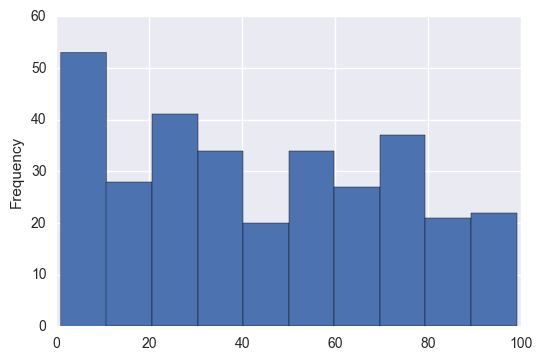

In [46]:
# plot a histogram of the highest placement in the chart for all the songs
df_by_song_described.ix["min"].plot(kind = 'hist')

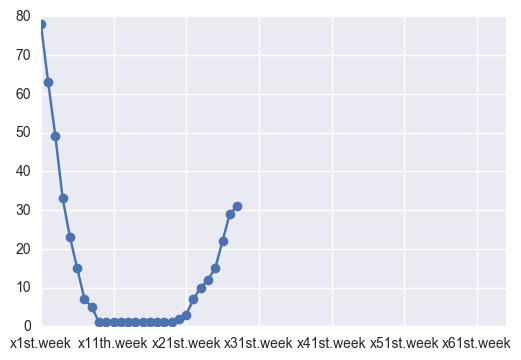

In [47]:
# Tough to observe anything particularly useful,
# so we plot the first song's rankings from week to week
df_by_song['Independent Women Part I'].plot(marker='o')

In [ ]:
# the song is gaining popularity as it approaches higher ranking (going lower on our graph)
# and slowly losing the fellowship, climbing higher and eventually out of the billboard

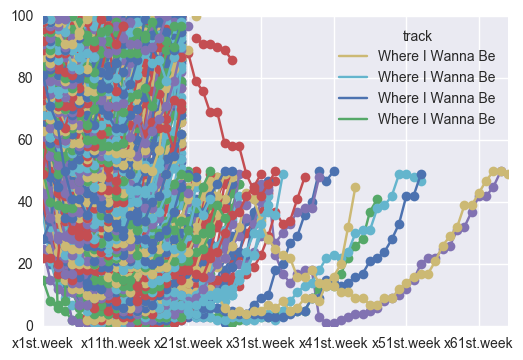

In [49]:
# plot all songs on the same graph
ax = df_by_song['Independent Women Part I'].plot(marker='o')

for row in df_by_song.columns:
    if row != 'Independent Women Part I':
        df_by_song[row].plot(marker='o', ax=ax)

#the majority of the songs seem to enter the billboard for a brief moment, just like we would expect

In [51]:
# how many weeks was each song present on our billboard
weeks_by_song = df_by_song_described.iloc[0]
print df_by_song_described.iloc[0].head()

track
Independent Women Part I                 28.0
Maria, Maria                             26.0
I Knew I Loved You                       33.0
Music                                    24.0
Come On Over Baby (All I Want Is You)    21.0
Name: count, dtype: float64


(array([  47.,   58.,   46.,  119.,   26.,   12.,    2.,    2.,    1.,    4.]),
 array([  1. ,   6.6,  12.2,  17.8,  23.4,  29. ,  34.6,  40.2,  45.8,
         51.4,  57. ]),
 <a list of 10 Patch objects>)

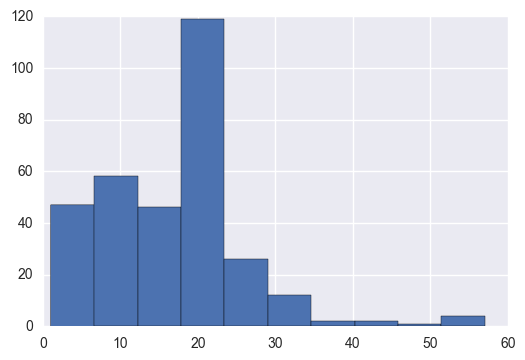

In [52]:
#Plot a histogram for these values

plt.hist(weeks_by_song)

In [ ]:
# there appears to be a positive skew to the distribution
# this is expected because the majority of the songs would have less time on our chart
# the mode for our set of songs appears to be somewhere around 20 weeks

In [53]:
# transpose the df_by_song_described to plot the statistical components for different songs
df_by_song_T = pd.DataFrame(data = np.asarray(df_by_song_described).T.tolist(),columns = df_by_song_described.index.values, index =df_by_song_described.columns[:]) 


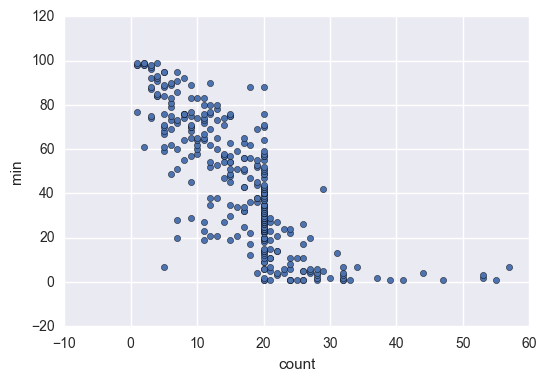

In [54]:
# the longer the song stays on the billboard, the higher in rank it should get
# compare the count (number of weeks the song appears on the charts) to the minimum value it 
# eventually gets to (higher rank)
df_by_song_T.plot(kind = 'scatter', x='count',y='min')

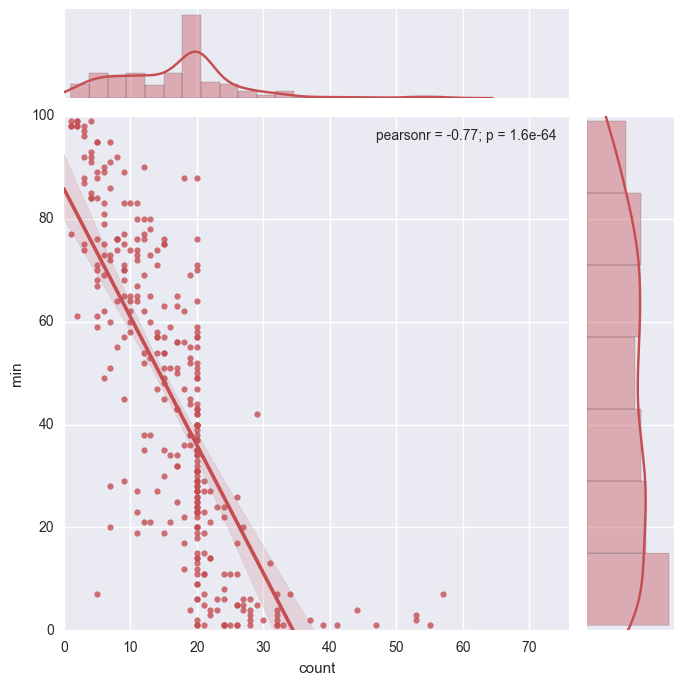

In [55]:
#Seaborn adds a little more detail

sns.set(style="darkgrid", color_codes=True)

sns.jointplot("count", "min", data=df_by_song_T, kind="reg", xlim=(0, 76), ylim=(0, 100), color="r", size=7)

Plots above show that our assumption was not bad: the songs that have reached a high rank, have also spent more weeks on the chart
The vertical collection of dots around 20 weeks on x-axis is representative of the mode value for this distribution

In [ ]:
# how does our data look compared to the dates they were released?

In [80]:
# first, we convert the columns in our dataframe to datetime
df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])


In [92]:
# create a new dataframe with an index being a timestamp for when the song reached its peak
df_date_peaked = df_by_song_T
df_date_peaked.index = df['date.peaked']
df_date_peaked.head()

,count,mean,std,min,25%,50%,75%,max,date.peaked
date.peaked,,,,,,,,,
2000-11-18,28.0,14.821429,20.228424,1.0,NaN,NaN,NaN,78.0,NaT
2000-04-08,26.0,10.500000,14.269548,1.0,NaN,NaN,NaN,48.0,NaT
2000-01-29,33.0,17.363636,18.127704,1.0,NaN,NaN,NaN,71.0,NaT
2000-09-16,24.0,13.458333,13.396882,1.0,NaN,NaN,NaN,44.0,NaT
2000-10-14,21.0,19.952381,17.673359,1.0,NaN,NaN,NaN,57.0,NaT


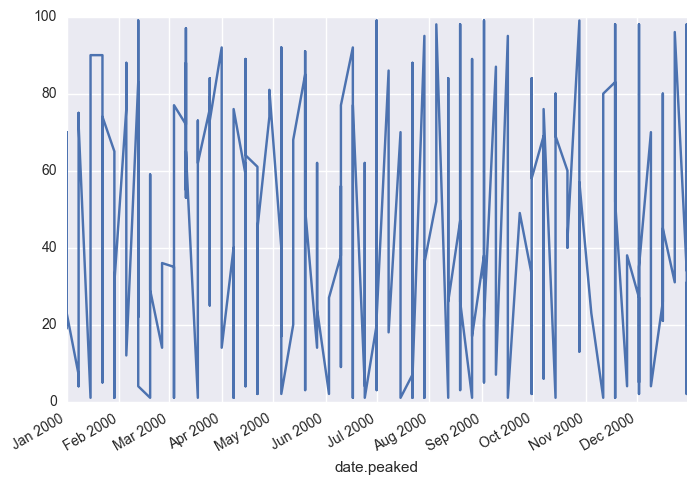

In [99]:
df_date_peaked['min'].plot()

This graph isn't pretty but it is hard to see any relation between a song ranking high and the month it peaked in the chart.
Maybe further specification of the song by genre may allow to see some underlying trend

In [ ]:
# suppose we now wanted to see if the starting date has had any effect on 
# the song's performance and we will correlate it with the song's minimum 
# value or the highest rank it has reached.

In [101]:
# create a new dataframe with an index being a timestamp for when the song "started"
df_date_entered = df_by_song_T
df_date_entered.index = df['date.entered']
df_date_entered.head()

,count,mean,std,min,25%,50%,75%,max,date.peaked
date.entered,,,,,,,,,
2000-09-23,28.0,14.821429,20.228424,1.0,NaN,NaN,NaN,78.0,NaT
2000-02-12,26.0,10.500000,14.269548,1.0,NaN,NaN,NaN,48.0,NaT
1999-10-23,33.0,17.363636,18.127704,1.0,NaN,NaN,NaN,71.0,NaT
2000-08-12,24.0,13.458333,13.396882,1.0,NaN,NaN,NaN,44.0,NaT
2000-08-05,21.0,19.952381,17.673359,1.0,NaN,NaN,NaN,57.0,NaT


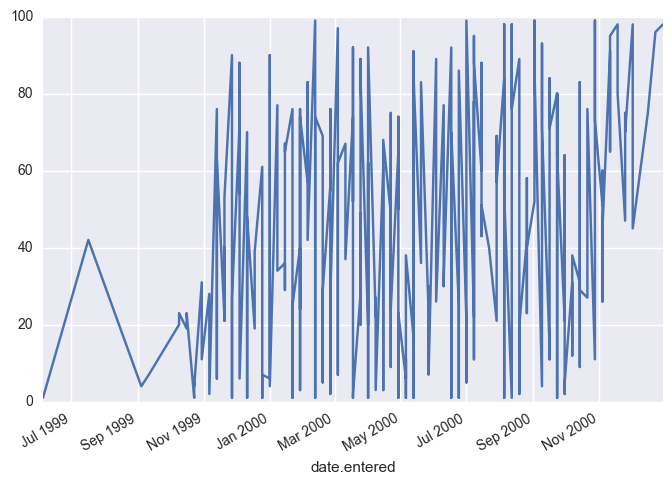

In [102]:
df_date_entered['min'].plot()

Once again, this data is "choppy", and the songs appear to be reaching lower values (high rank) throughout the year

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data we obtained contains information about 317 songs. The dataset contains the name of the song, the name of the artist, duration of the song, the date it entered the chart and the date it reached its highest rank.

The biggest block of data is the rankings for every song since its first week on the chart. Because songs enter the chart at different moments, the first week for one song does not represent the same week for another.

Breaking down the information by genre, we observe the "Rock" category to have the most songs in our dataset (137 entries or roughly 43%). "Country" and "Rap" are the next big players with 74 and 58 entries respectively.

Three genre categories were comprised of only one song: "Gospel", "Jazz", and "Reggae"; and only three categories have had songs that got to the number one spot of our chart, namely, "Rock", "Country", and "Latin". Songs in the "Rap" category came close, but only went as high as number 2.

One might assume that the more popular songs, like the ones that get to be number one on our chart, would have a stronger presence in the chart throughout the time, and indeed, one of the graphs we built appears to exhibit a trend such as the longer the song appears to be on the chart, the higher it goes in the rankings.

The songs in our dataframe have a mode occurence on our chart - and it is somewhere around 20 weeks for each song


## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [57]:
bb = pd.read_csv("assets/billboard.csv")
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#check to see if the columns at the end are missing values entirely
bb['x76th.week'].unique()

array([ nan])

In [59]:
#dropping columns where all values are Null
bb.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

In [60]:
bb.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
x24th.week         float64
x25th.week         float64
x26th.week         float64
x27th.week         float64
x28th.week         float64
x29th.week         float64
x30th.week         float64
x

In [61]:
bb['x1st.week'] = bb['x1st.week'].astype(float)
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
bb.rename(columns={'artist.inverted': 'artist'}, inplace=True)
bb.head()

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,x34th.week,x35th.week,x36th.week,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Rename all the week columns
i=1
for row in bb.columns[7:]:
    bb.rename(columns={row: str('Week '+ str(i))}, inplace=True)
    i = i+1
    
bb.head()

,year,artist,track,time,genre,date.entered,date.peaked,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16,Week 17,Week 18,Week 19,Week 20,Week 21,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Week 44,Week 45,Week 46,Week 47,Week 48,Week 49,Week 50,Week 51,Week 52,Week 53,Week 54,Week 55,Week 56,Week 57,Week 58,Week 59,Week 60,Week 61,Week 62,Week 63,Week 64,Week 65
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Changing time from string to seconds
time_separated = bb["time"].apply(lambda x: x.split(":"))
bb["time"] = time_separated.apply(lambda x: int(x[0])*60+int(x[1]))
bb.head()

,year,artist,track,time,genre,date.entered,date.peaked,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15,Week 16,Week 17,Week 18,Week 19,Week 20,Week 21,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34,Week 35,Week 36,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Week 44,Week 45,Week 46,Week 47,Week 48,Week 49,Week 50,Week 51,Week 52,Week 53,Week 54,Week 55,Week 56,Week 57,Week 58,Week 59,Week 60,Week 61,Week 62,Week 63,Week 64,Week 65
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [66]:
value_list = []

for row in bb.columns[7:]:
    value_list.append(row)

bb_widetolong = pd.melt(bb, id_vars='track', value_vars=value_list, var_name="Week", value_name='Ranking', col_level=None)

In [67]:
print bb_widetolong

                                                   track     Week  Ranking
0                               Independent Women Part I   Week 1     78.0
1                                           Maria, Maria   Week 1     15.0
2                                     I Knew I Loved You   Week 1     71.0
3                                                  Music   Week 1     41.0
4                  Come On Over Baby (All I Want Is You)   Week 1     57.0
5                                  Doesn't Really Matter   Week 1     59.0
6                                            Say My Name   Week 1     83.0
7                                            Be With You   Week 1     63.0
8                                             Incomplete   Week 1     77.0
9                                                 Amazed   Week 1     81.0
10                                      It's Gonna Be Me   Week 1     82.0
11                                     What A Girl Wants   Week 1     71.0
12                       

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

The graph below shows the genre of the songs in our chart

In [68]:
%%HTML
<div class='tableauPlaceholder' id='viz1478537789556' style='position: relative'><noscript><a href='#'><img alt='Genres (count) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;Billboard_1&#47;Genrescount&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Billboard_1&#47;Genrescount' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;Billboard_1&#47;Genrescount&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1478537789556');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

The dataset presents information on a list of songs and their placement in our chart during a certain period in time.

If one attempts to model the popularity of a song based on the data above, he constructs his model on a couple of premises:
- disregard for the perception and the complexity of the actual music, since the data on the songs we have collected is merely a bleak representation of what those songs actualy are, and why exactly people ranked them so high in the first place
- disregard for the other songs that have been in the chart at the same time
- since all of the songs competed for a rank on a mutually exclusive field, one must take into account the effect one song in this chart has on every other


## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- one may want to collect more data about the songs to analyze their success but it is important to outline the depth of this research. How much complex data would give us any meaningful predictive abilities?
- it may be useful to include the songs that occured in our billboard chart around that time to make our predictions in the genre sphere, for example, more accurate
- to evaluate the effect the ranking of one song has on another would require a direct comparison of a given set of songs during the period when they were all present in the chart. However, one song may have stayed in the charts for a while, and people are beginning to lose interest, while a newer song seems to be doing better. Can we say the new song is more popular? Only for the given period.

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 